#**Pattern Recognition and Machine Learning 2022 Winter Semester**

##**Lab - 4 Assignment**

###Name: Dev Goel
###Roll No: B20CS090

##Importing the Necessary Python Libraries and Components

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

#**Question - 1**

##**1.** Perform pre-processing and visualization of the dataset. Split the data into train and test sets. Also identify the useful columns and drop the unnecessary ones.

- **Input the dataset**

In [2]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSet/LAB-4/titanic.csv")
dataset

,PassengerId,Name,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,male,27.0,211536,13.0000,NaN,S,0
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,112053,30.0000,B42,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,W./C. 6607,23.4500,NaN,S,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,111369,30.0000,C148,C,1


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Name         891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   Ticket       891 non-null    object 
 6   Fare         891 non-null    float64
 7   Cabin        204 non-null    object 
 8   Embarked     889 non-null    object 
 9   Survived     891 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 69.7+ KB


In [4]:
dataset.isnull().sum()

PassengerId      0
Name             0
Pclass           0
Sex              0
Age            177
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [5]:
"""Also identify the useful columns and drop the unnecessary ones"""

# I dropped PassengerId, Name, Ticket because it is not a relevant feature for determining the target (Survival).
# I dropped Cabin because it contains lots of missing Nan values.
dataset.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)
dataset

,Pclass,Sex,Age,Fare,Embarked,Survived
0,3,male,22.0,7.2500,S,0
1,1,female,38.0,71.2833,C,1
2,3,female,26.0,7.9250,S,1
3,1,female,35.0,53.1000,S,1
4,3,male,35.0,8.0500,S,0
...,...,...,...,...,...,...
886,2,male,27.0,13.0000,S,0
887,1,female,19.0,30.0000,S,1
888,3,female,NaN,23.4500,S,0
889,1,male,26.0,30.0000,C,1


In [6]:
dataset.isnull().sum()

Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
Survived      0
dtype: int64

In [7]:
# Dropping the remaining Nan/missing values from the dataset.
dataset.dropna(inplace = True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    object 
 2   Age       712 non-null    float64
 3   Fare      712 non-null    float64
 4   Embarked  712 non-null    object 
 5   Survived  712 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 38.9+ KB


In [8]:
dataset.isnull().sum()

Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
Survived    0
dtype: int64

In [9]:
# Performing categorical encoding wherever applicable in the data
# Storing categorical data in a list.
categoricalData = []
for i in dataset.columns:
    if dataset[i].dtype == 'object':
        categoricalData.append(i)

Label_Encode = LabelEncoder()
for i in categoricalData:
    y = dataset[i]
    transform = Label_Encode.fit_transform(y)
    dataset[i] = transform
    
dataset

,Pclass,Sex,Age,Fare,Embarked,Survived
0,3,1,22.0,7.2500,2,0
1,1,0,38.0,71.2833,0,1
2,3,0,26.0,7.9250,2,1
3,1,0,35.0,53.1000,2,1
4,3,1,35.0,8.0500,2,0
...,...,...,...,...,...,...
885,3,0,39.0,29.1250,1,0
886,2,1,27.0,13.0000,2,0
887,1,0,19.0,30.0000,2,1
889,1,1,26.0,30.0000,0,1


In [10]:
dataset

,Pclass,Sex,Age,Fare,Embarked,Survived
0,3,1,22.0,7.2500,2,0
1,1,0,38.0,71.2833,0,1
2,3,0,26.0,7.9250,2,1
3,1,0,35.0,53.1000,2,1
4,3,1,35.0,8.0500,2,0
...,...,...,...,...,...,...
885,3,0,39.0,29.1250,1,0
886,2,1,27.0,13.0000,2,0
887,1,0,19.0,30.0000,2,1
889,1,1,26.0,30.0000,0,1


Plot: Density v/s Pclass



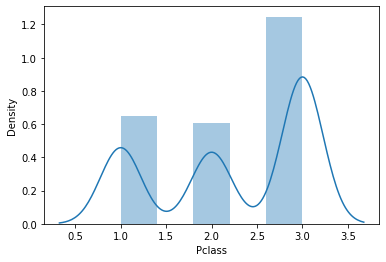

 
Plot: Density v/s Sex



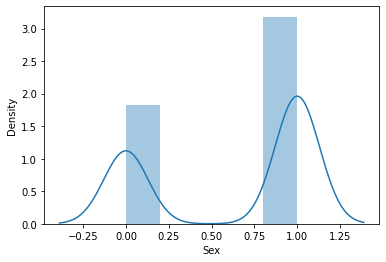

 
Plot: Density v/s Age



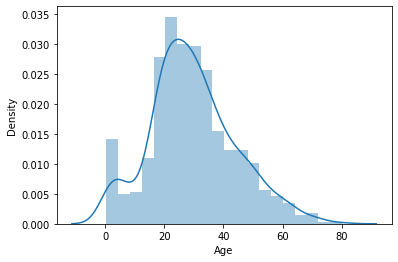

 
Plot: Density v/s Fare



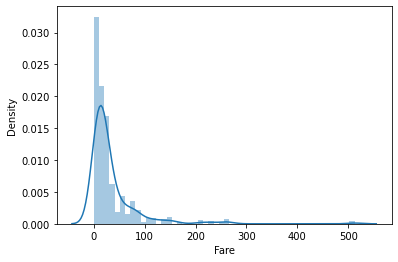

 
Plot: Density v/s Embarked



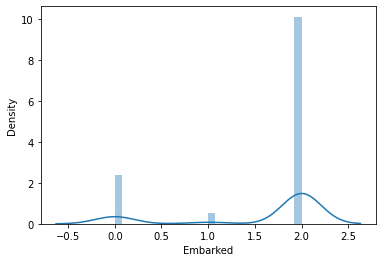

In [11]:
""" Visualization of the dataset """

for feature in dataset.columns:
    if feature != 'Survived':
        sns.distplot(dataset[feature])
        print(f"Plot: Density v/s {feature}\n")
        plt.show()
        print(" ")


# These plots describe the distribution of samples.

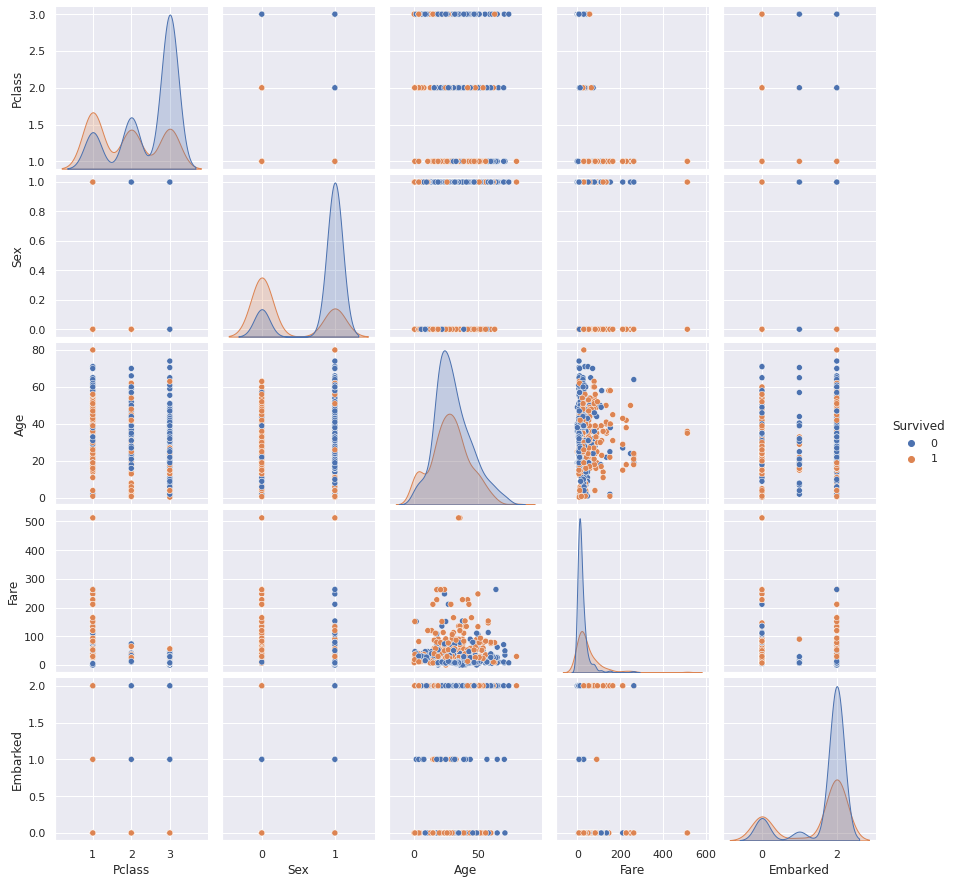

In [12]:
sns.set()
sns.pairplot(dataset, hue='Survived', height=2.5);

In [13]:
"""Split the data into train and test sets"""

target = "Survived"
X = dataset.iloc[:,dataset.columns != target]
y = dataset.iloc[:,dataset.columns.get_loc(target)]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2221)

In [14]:
print("--> Training Sets:\n")
print(x_train)
print(y_train)
print("\n--> Testing Sets:\n")
print(x_test)
print(y_test)

--> Training Sets:

     Pclass  Sex   Age     Fare  Embarked
439       2    1  31.0  10.5000         2
327       2    0  36.0  13.0000         2
184       3    0   4.0  22.0250         2
372       3    1  19.0   8.0500         2
6         1    1  54.0  51.8625         2
..      ...  ...   ...      ...       ...
75        3    1  25.0   7.6500         2
536       1    1  45.0  26.5500         2
546       2    0  19.0  26.0000         2
169       3    1  28.0  56.4958         2
789       1    1  46.0  79.2000         0

[569 rows x 5 columns]
439    0
327    1
184    1
372    0
6      0
      ..
75     0
536    0
546    1
169    0
789    0
Name: Survived, Length: 569, dtype: int64

--> Testing Sets:

     Pclass  Sex   Age     Fare  Embarked
70        2    1  32.0  10.5000         2
178       2    1  30.0  13.0000         2
323       2    0  22.0  29.0000         2
245       1    1  44.0  90.0000         1
728       2    1  25.0  26.0000         2
..      ...  ...   ...      ...       .

In [15]:
# For comparison with scikit-learn implementation.
X_train = x_train
X_test = x_test
Y_train = y_train
Y_test = y_test

##**2.** Identify the best possible variant of naive bayes classifier for the given dataset. Justify your reason for the same.

In [16]:
"""
On visualizing the dataset and observing the datatypes of features present in the dataset,
We can clearly say/observe that the feature Age, Fare follows gaussian distribution.
Hence, not neglecting the contribution of Age, Fare as features we can implement the Gaussian Naive Bayes Classifier for this
model.
"""

"""
Gaussian Naive Bayes Classifer:

- It is a variant of Naive Bayes that follows Gaussian normal distribution and supports continuous data.
"""

print("The likelihood of the features for the Gaussian normal distribution is assumed to be:")

The likelihood of the features for the Gaussian normal distribution is assumed to be:


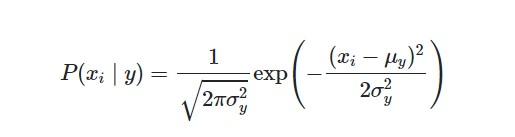

In [17]:
bestPossibleVariant = "Gaussian Naive Bayes Classifier"
print(f"Hence, the best possible variant of naive bayes classifier for this dataset is: {bestPossibleVariant}")

Hence, the best possible variant of naive bayes classifier for this dataset is: Gaussian Naive Bayes Classifier


##**3.** Implement the identified variant of Naive Bayes Classifier from scratch.

In [18]:
def fit(trainSetX, trainSetY):
    mean = trainSetX.groupby(by=trainSetY).mean()    
    var = trainSetX.groupby(by=trainSetY).var()
    return mean, var

mean, var = fit(x_train, y_train)
print("----> Mean: \n")
print(mean)
print("\n----> Variance: \n")
print(var)

----> Mean: 

            Pclass       Sex        Age       Fare  Embarked
Survived                                                    
0         2.448795  0.858434  31.081325  23.489745  1.680723
1         1.856540  0.312236  28.408945  52.445184  1.417722

----> Variance: 

            Pclass       Sex         Age         Fare  Embarked
Survived                                                       
0         0.586494  0.121892  198.188230  1108.332699  0.489899
1         0.674247  0.215655  227.849721  5512.111322  0.803583


In [19]:
def classes(mean, var):
    _n_survived = []
    for i in mean.columns:
        _n_survived.append([mean[i][0], var[i][0]])

    _survived = []
    for i in mean.columns:
        _survived.append([mean[i][1], var[i][1]])
    return _n_survived, _survived

notSurvived, Survived = classes(mean, var)
print(notSurvived)
print(" ")
print(Survived)

[[2.4487951807228914, 0.5864940123029883], [0.858433734939759, 0.1218924034506607], [31.08132530120482, 198.18823026243945], [23.48974487951807, 1108.332699293056], [1.680722891566265, 0.4898991737342118]]
 
[[1.8565400843881856, 0.6742473002932138], [0.31223628691983124, 0.2156547235929343], [28.408945147679326, 227.84972134019876], [52.44518396624473, 5512.111322202197], [1.4177215189873418, 0.803582922119717]]


In [20]:
def probability(value, mean, variance):
    equation_1 = 1/(np.sqrt(2*np.pi*variance))
    equation_2a = -(value-mean)**2
    equation_2b = 2*variance
    fraction = equation_2a / equation_2b
    prob = equation_1*np.exp(fraction)
    return prob

In [21]:
def _Predictions(x_test, notSurvived, Survived):
    x_test = x_test.to_numpy()
    PredictionsSurv = []
    PredictionsNSurv = []
    for i in range(len(x_test)):
        probsur = 1;
        probnsur = 1;
        for k in range(5):
            probnsur = probnsur*probability(x_test[i][k], notSurvived[k][0], notSurvived[k][1])
            probsur = probsur*probability(x_test[i][k], Survived[k][0], Survived[k][1])
        PredictionsNSurv.append(probnsur)
        PredictionsSurv.append(probsur)
    return PredictionsSurv, PredictionsNSurv

PredictionsSurv, PredictionsNSurv = _Predictions(x_test, notSurvived, Survived)
print(PredictionsSurv)
print(PredictionsNSurv)

[5.822670549915289e-06, 6.067579268617945e-06, 1.458981528099007e-05, 2.3676235217729206e-06, 6.4283179173637765e-06, 2.045562942843626e-06, 2.067615836052389e-06, 5.111381910926542e-07, 2.379507385376636e-06, 2.498598395222689e-06, 1.3358170971163364e-05, 2.052109940222806e-06, 3.235911923661788e-07, 3.348234974985019e-06, 1.935478107538428e-06, 1.7107329348157912e-06, 4.1860633533721214e-07, 4.542118777682783e-07, 2.4119518926391227e-06, 5.316880245827022e-06, 4.703522954882698e-06, 1.941213703802065e-06, 4.859533101745309e-06, 8.264923619813602e-06, 2.7146709660461662e-06, 1.5128949300438428e-06, 4.927553640300436e-06, 5.696871749360755e-06, 2.1670112130263565e-07, 1.9075829618923836e-06, 5.915461986660422e-06, 7.902723476825867e-07, 1.672138460544098e-06, 5.80561517957409e-06, 1.535407819323036e-05, 1.55513595449536e-05, 4.259394261460989e-06, 2.163703066981395e-06, 2.2481821930114286e-06, 4.438973721197506e-07, 6.929695932982151e-07, 3.265617154544076e-06, 1.34075994402524e-06, 5.

In [22]:
print(len(PredictionsSurv))
print(len(x_test))
print(PredictionsNSurv)

143
143
[7.448337029365204e-05, 7.64193424939922e-05, 3.409249287445138e-06, 9.856299258161217e-07, 7.31623729729123e-05, 2.011691739558966e-08, 5.383454661486081e-05, 6.327878392499202e-08, 7.242150366812429e-07, 4.51472626227785e-05, 3.859890811261658e-06, 5.312478528421582e-05, 9.856468949238582e-10, 3.403610860372623e-08, 4.854213401282548e-05, 2.7610198574897538e-05, 2.407640336840547e-06, 1.7095785294464584e-06, 2.2495344207658584e-07, 3.492577221995783e-06, 4.524846421355464e-05, 4.7701368021245216e-05, 2.1481596242790633e-07, 1.7130445208700345e-07, 1.109040678460197e-06, 4.930796959476905e-05, 2.8333946541179304e-06, 7.501547157239845e-05, 6.74613668430005e-06, 5.986364976845934e-05, 2.409528359398161e-06, 4.055986987826228e-06, 5.534662733147892e-05, 3.88437477127746e-06, 3.865559441203494e-06, 3.9759676659993875e-06, 1.3582977809794642e-06, 5.820068365500084e-05, 6.333146731716612e-05, 1.6407378822539733e-06, 1.1501616670839012e-05, 1.7921401754350305e-08, 1.5749806391026054

In [23]:
def priorProbability(y_train):
    y_train2 = y_train.tolist()
    cntSurvived = 0
    cntNSurvived = 0
    for i in range(len(y_train2)):
        if(y_train2[i] == 0):
            cntNSurvived = cntNSurvived + 1
        else:
            cntSurvived = cntSurvived + 1

    probPriorSurvived = cntSurvived/len(y_train2)
    probPriorNSurvived = cntNSurvived/len(y_train2)
    return probPriorSurvived, probPriorNSurvived

probPriorSurvived, probPriorNSurvived = priorProbability(y_train)
print(probPriorSurvived)
print(probPriorNSurvived)

0.4165202108963093
0.5834797891036907


In [24]:
_PredictionsSurv = PredictionsSurv
_PredictionsNSurv = PredictionsNSurv
for i in range(len(_PredictionsSurv)):
    _PredictionsSurv[i] = _PredictionsSurv[i]*probPriorSurvived
    _PredictionsNSurv[i] = _PredictionsNSurv[i]*probPriorNSurvived

In [25]:
def _evidence(PredictionsSurv, PredictionsNSurv):
    evidence = []
    for i in range(len(PredictionsSurv)):
        evidence.append(PredictionsSurv[i] + PredictionsNSurv[i])
    return evidence

evidence = _evidence(_PredictionsSurv, _PredictionsNSurv)
print(_PredictionsSurv)
print(_PredictionsNSurv)
print(evidence)

[2.4252599654304454e-06, 2.5272693965948207e-06, 6.07695293777618e-06, 9.861630486119194e-07, 2.677524334648884e-06, 8.520183083549022e-07, 8.6120378408509e-07, 2.1289938715107037e-07, 9.91112917986402e-07, 1.0407167305233344e-06, 5.563948190097921e-06, 8.547452650840159e-07, 1.3478227168854898e-07, 1.394607537911159e-06, 8.061657495370957e-07, 7.125548427967355e-07, 1.7435799907718678e-07, 1.8918842711965193e-07, 1.0046267109937998e-06, 2.214588081302292e-06, 1.959112373123373e-06, 8.085547413024417e-07, 2.024093752396552e-06, 3.4425077291666496e-06, 1.1307153232916369e-06, 6.301513153258185e-07, 2.052425681460814e-06, 2.3728622224929682e-06, 9.02603967464405e-08, 7.94546857589622e-07, 2.4639094742329e-06, 3.291644049222725e-07, 6.964794642336577e-07, 2.4181560589790147e-06, 6.395283887162733e-06, 6.477455557388407e-06, 1.7741237960742607e-06, 9.012260577760819e-07, 9.364133211664474e-07, 1.8489222705163602e-07, 2.886358411453022e-07, 1.360195545917304e-06, 5.584536146467169e-07, 2.35

In [26]:
def posteriorProb(PredictionsSurv, PredictionsNSurv, probPriorSurvived, probPriorNSurvived, evidence):
    for i in range(len(PredictionsSurv)):
        PredictionsSurv[i] = (PredictionsSurv[i]*probPriorSurvived)/evidence[i]
        PredictionsNSurv[i] = (PredictionsNSurv[i]*probPriorNSurvived)/evidence[i]
    return PredictionsSurv, PredictionsNSurv

PredictionsSurv, PredictionsNSurv = posteriorProb(PredictionsSurv, PredictionsNSurv, probPriorSurvived, probPriorNSurvived, evidence)
print(PredictionsSurv)
print(PredictionsNSurv)

[0.022015346407251748, 0.02234165876374783, 0.3138007591747426, 0.26309347400281674, 0.0245830768503985, 0.41086000550756707, 0.011114972893824468, 0.3549613472276177, 0.292017441884502, 0.015830109170943928, 0.29650234658786306, 0.011177284295595086, 0.41475050407038444, 0.4106721888289012, 0.011527286737282932, 0.017642600809644422, 0.04598855516865579, 0.06640370094588927, 0.36838962682848186, 0.21691581698490553, 0.0287725820719914, 0.011758507261529341, 0.3922315133934643, 0.4047678385895907, 0.26491223885124515, 0.00892746902602752, 0.23069523822647914, 0.021419235364205348, 0.009336974538524341, 0.00926399323343553, 0.26519784946633396, 0.05085916156141444, 0.008793474886738428, 0.2150041992675087, 0.30792266661386164, 0.30668217582103785, 0.28790627723022016, 0.01076813730971635, 0.010294138556695663, 0.06742195090916601, 0.01717565545512762, 0.41334255719244156, 0.4164516812405626, 0.03029867009487115, 0.22127801020616888, 0.011432361072146487, 0.1638268560534051, 0.2359898868

In [27]:
def _FinalPredictions(x_test, PredictionsSurv, PredictionsNSurv):
    Predictions = []
    for i in range(len(x_test)):
        if(PredictionsSurv[i] > PredictionsNSurv[i]):
            Predictions.append(1)
        else:
            Predictions.append(0)
    return Predictions
Predictions = _FinalPredictions(x_test, PredictionsSurv, PredictionsNSurv)
Predictions

[0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0]

In [28]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, Predictions)
print(f"The accuracy I got for the implementation from scratch of the naive bayes classifier is: {acc*100}%")

The accuracy I got for the implementation from scratch of the naive bayes classifier is: 76.92307692307693%


##**4.** Perform 5-fold cross-validation using the entire training feature set.

In [29]:
def KFold(datasetX, datasetY, folds):
    _5foldDataX = np.array_split(datasetX, folds)
    _5foldDataY = np.array_split(datasetY, folds)
    return _5foldDataX, _5foldDataY

_5foldDataX, _5foldDataY = KFold(x_train, y_train, 5)
print(_5foldDataX)
print(_5foldDataY)

[     Pclass  Sex   Age      Fare  Embarked
439       2    1  31.0   10.5000         2
327       2    0  36.0   13.0000         2
184       3    0   4.0   22.0250         2
372       3    1  19.0    8.0500         2
6         1    1  54.0   51.8625         2
..      ...  ...   ...       ...       ...
763       1    0  36.0  120.0000         2
585       1    0  18.0   79.6500         2
478       3    1  22.0    7.5208         2
294       3    1  24.0    7.8958         2
794       3    1  25.0    7.8958         2

[114 rows x 5 columns],      Pclass  Sex   Age      Fare  Embarked
477       3    1  29.0    7.0458         2
528       3    1  39.0    7.9250         2
349       3    1  42.0    8.6625         2
311       1    0  18.0  262.3750         0
571       1    0  53.0   51.4792         2
..      ...  ...   ...       ...       ...
332       1    1  38.0  153.4625         2
122       2    1  32.5   30.0708         0
421       3    1  21.0    7.7333         1
157       3    1  30.0    8.

In [30]:
from sklearn.metrics import mean_squared_error as mse
results = []
L =[]
Dict = {}
for i in range(len(_5foldDataX)):
    _trainDataPartsX = []
    _trainDataPartsY = []        
    for j in range(len(_5foldDataX)):
        if j == i:
            _testDataX = _5foldDataX[j]
            _testDataY = _5foldDataY[j]
        else:
            _trainDataPartsX.append(_5foldDataX[j])
            _trainDataPartsY.append(_5foldDataY[j])
    _trainDataX = pd.concat(_trainDataPartsX)
    _trainDataY = pd.concat(_trainDataPartsY) 
    mean, var = fit(_trainDataX, _trainDataY)
    notSurvived, Survived = classes(mean, var)
    PredictionsSurv, PredictionsNSurv = _Predictions(_testDataX, notSurvived, Survived)
    probPriorSurvived, probPriorNSurvived = priorProbability(_testDataY)
    evidence = _evidence(PredictionsSurv, PredictionsNSurv)
    PredictionsSurv, PredictionsNSurv = posteriorProb(PredictionsSurv, PredictionsNSurv, probPriorSurvived, probPriorNSurvived, evidence)
    Predictions = _FinalPredictions(_testDataX, PredictionsSurv, PredictionsNSurv)
    results.append(accuracy_score(_testDataY, Predictions))
    Dict[i+1]=accuracy_score(_testDataY, Predictions)

In [31]:
results

[0.7982456140350878,
 0.8070175438596491,
 0.7543859649122807,
 0.8070175438596491,
 0.7787610619469026]

In [32]:
np.mean(results)*100

78.90855457227138

##**5.** Visualize and summarize the results across the cross-validation sets. Compute the probability of the top class for each row in the testing dataset.

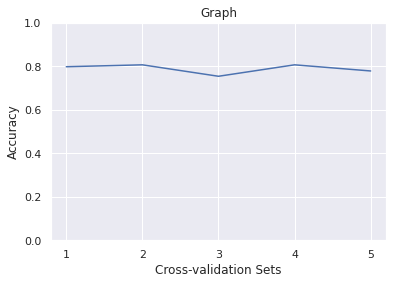

In [33]:
myList = Dict.items()
myList = sorted(myList) 
x, y = zip(*myList) 

plt.plot(x, y)
plt.xticks([1, 2, 3, 4, 5]) 
plt.ylim(0, 1)
plt.title("Graph")
plt.xlabel("Cross-validation Sets")
plt.ylabel("Accuracy")
plt.show()

In [34]:
def probabilityOfTopClass(PredictionsSurv, PredictionsNSurv):
    probForSurvivedDeclarement = []
    probForNonSurvivedDeclarement = []
    for i in range(len(PredictionsSurv)):
        if(PredictionsSurv[i] > PredictionsNSurv[i]):
            probForSurvivedDeclarement.append((PredictionsSurv[i]/(PredictionsSurv[i] + PredictionsNSurv[i])))
            print(f"The probability for which the row {i+1} person declared as survived is: {PredictionsSurv[i]/(PredictionsSurv[i] + PredictionsNSurv[i])}")
        else:
            probForNonSurvivedDeclarement.append(PredictionsNSurv[i]/(PredictionsSurv[i] + PredictionsNSurv[i]))
            print(f"The probability for which the row {i+1} person declared as not survived is: {PredictionsNSurv[i]/(PredictionsSurv[i] + PredictionsNSurv[i])}")
    return probForSurvivedDeclarement, probForNonSurvivedDeclarement

l1, l2 = probabilityOfTopClass(_PredictionsSurv, _PredictionsNSurv)
l1.sort()
l2.sort()
print(l1)
print(l2)

The probability for which the row 1 person declared as not survived is: 0.9616894595163408
The probability for which the row 2 person declared as not survived is: 0.9611127678022572
The probability for which the row 3 person declared as survived is: 0.6856115584114116
The probability for which the row 4 person declared as survived is: 0.5503812916336962
The probability for which the row 5 person declared as not survived is: 0.9571444026980576
The probability for which the row 6 person declared as survived is: 0.9810666880668311
The probability for which the row 7 person declared as not survived is: 0.9808039652463032
The probability for which the row 8 person declared as survived is: 0.8045439776234853
The probability for which the row 9 person declared as survived is: 0.6260740211553023
The probability for which the row 10 person declared as not survived is: 0.972571190461133
The probability for which the row 11 person declared as survived is: 0.6381490994008727
The probability for wh

##**6.** Compare your scratch implementation with scikit-learn in terms of the performance.

In [35]:
clf = GaussianNB()
clf.fit(X_train, Y_train)
predictions = clf.predict(X_test)


In [36]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_test, predictions)
print(f"The scikit-learn accuracy came out to be: {acc*100}%")

The scikit-learn accuracy came out to be: 76.22377622377621%


##**7.** Implement any other model of your choice [not necessarily from scratch] and perform 5-fold cross-validation and summarize the results. Compare it with the Naive Bayes Classifier you have implemented and justify your results.

In [37]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, Y_train)
predictions = clf.predict(X_test)
accuracy_score(Y_test, predictions)

0.7272727272727273

In [38]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score as cvs
kf = KFold(5)
results = cvs(clf, X_train, Y_train, cv = kf)
print(results)
print(np.mean(results)*100)

[0.77192982 0.77192982 0.75438596 0.74561404 0.69026549]
74.68250271696941


#QUESTION - 2

### Data Pre-Processing

In [39]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSet/LAB-4/dataset.csv")
dataset.head()

,X0,X1,X2,X3,X4,X5,X6,Y
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [40]:
dataset.rename(columns={'X0': 'Area', 'X1': 'Perimeter', 'X2': 'Compactness', 'X3': 'Length of kernel', 'X4': 'Width of Kernel', 'X5': 'Asymmetry coefficient', 'X6': 'Length of kernel groove', 'Y': 'Classes'}, inplace=True)

In [41]:
dataset

,Area,Perimeter,Compactness,Length of kernel,Width of Kernel,Asymmetry coefficient,Length of kernel groove,Classes
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [42]:
dataset.isnull().sum()

Area                       0
Perimeter                  0
Compactness                0
Length of kernel           0
Width of Kernel            0
Asymmetry coefficient      0
Length of kernel groove    0
Classes                    0
dtype: int64

In [43]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area                     210 non-null    float64
 1   Perimeter                210 non-null    float64
 2   Compactness              210 non-null    float64
 3   Length of kernel         210 non-null    float64
 4   Width of Kernel          210 non-null    float64
 5   Asymmetry coefficient    210 non-null    float64
 6   Length of kernel groove  210 non-null    float64
 7   Classes                  210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


###**a.** Use histogram to plot the distribution of samples.


Distribution plot of Area



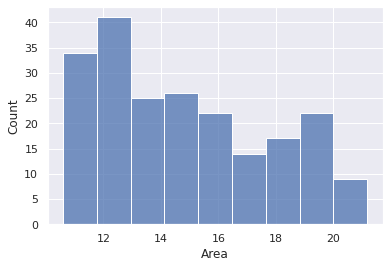


Distribution plot of Perimeter



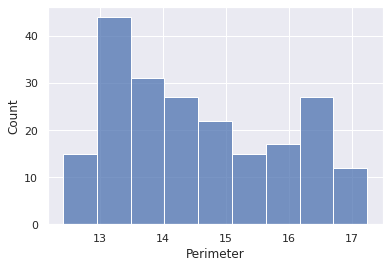


Distribution plot of Compactness



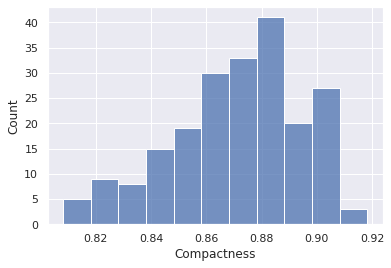


Distribution plot of Length of kernel



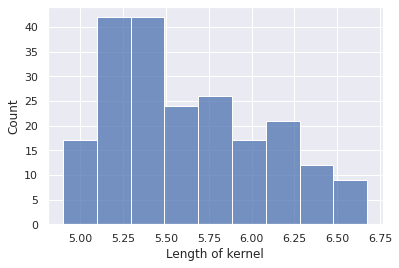


Distribution plot of Width of Kernel



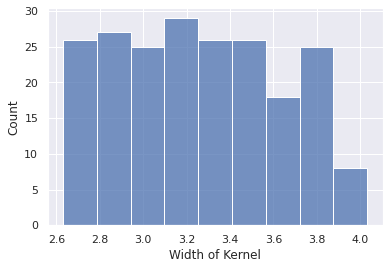


Distribution plot of Asymmetry coefficient



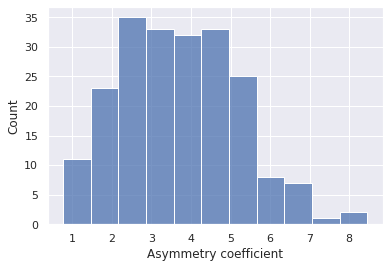


Distribution plot of Length of kernel groove



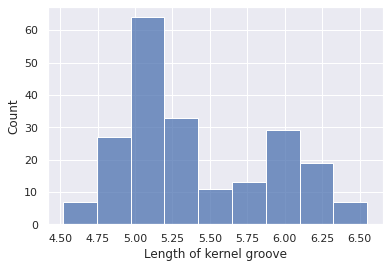

In [44]:
# Plotting the histogram to plot the distribution of samples.
for feature in dataset.columns:
    if feature != 'Classes':
        sns.histplot(dataset[feature])
        print(f"\nDistribution plot of {feature}\n")
        plt.show()

###**b.** Determine the prior probability for all the classes.

In [45]:
# Calculating the Prior probability for all the classes
cnt1 = 0
cnt2 = 0
cnt3 = 0
for i in dataset['Classes']:
    if i == 1:
        cnt1 = cnt1 + 1
    elif i == 2:
        cnt2 = cnt2 + 1
    elif i == 3:
        cnt3 = cnt3 + 1

no_of_samples = len(dataset)
prob_class_1 = cnt1/no_of_samples
prob_class_2 = cnt2/no_of_samples
prob_class_3 = cnt3/no_of_samples
print("Prior Class 1:",prob_class_1)
print("Prior Class 2:",prob_class_2)
print("Prior Class 3:",prob_class_3)

Prior Class 1: 0.3333333333333333
Prior Class 2: 0.3333333333333333
Prior Class 3: 0.3333333333333333


###**c.** Discretize the features into bins from scratch. Use of pandas, scikit learn and scipy is not allowed for this subpart.

In [46]:
def binning(dataset, features):
    for i in features:
        List = list(set(dataset[i].tolist()))
        List.sort()
        _max = List[-1]
        _min = List[0]
        _range = (_max - _min)/10
        for j in range(len(dataset[i].tolist())):
            for k in range(1, 11):
                if(dataset[i][j] <= _min + k*_range):
                    dataset[i][j] = k
                    break

binning(dataset, ["Area", "Perimeter", "Compactness", "Length of kernel", "Width of Kernel", "Asymmetry coefficient", "Length of kernel groove"])
# For converting the datatype to int.
for i in dataset.columns:
    dataset = dataset.astype({i:'int'})
print("The dataset after discretizing the features into bins:\n")
dataset

The dataset after discretizing the features into bins:



,Area,Perimeter,Compactness,Length of kernel,Width of Kernel,Asymmetry coefficient,Length of kernel groove,Classes
0,5,6,6,5,5,2,4,1
1,5,5,7,4,6,1,3,1
2,4,4,9,3,6,3,2,1
3,4,4,8,3,6,2,2,1
4,6,6,9,5,7,1,4,1
...,...,...,...,...,...,...,...,...
205,2,2,7,2,3,4,2,3
206,1,1,4,2,2,5,3,3
207,3,3,8,2,5,10,3,3
208,2,2,4,2,2,4,3,3


###Splitting the dataset into train and test sets.

In [47]:
target = "Classes"
X = dataset.iloc[:,dataset.columns != target]
y = dataset.iloc[:,dataset.columns.get_loc(target)]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2221)

In [48]:
train_dataset = X_train
train_dataset['Classes'] = y_train

In [49]:
train_dataset

,Area,Perimeter,Compactness,Length of kernel,Width of Kernel,Asymmetry coefficient,Length of kernel groove,Classes
96,9,9,7,9,9,4,9,2
106,8,8,9,8,9,3,9,2
90,9,10,7,10,9,2,10,2
101,7,8,9,6,8,2,7,2
159,1,2,2,3,1,7,4,3
...,...,...,...,...,...,...,...,...
168,1,2,2,2,1,5,4,3
177,1,1,3,2,1,6,3,3
134,5,6,7,5,6,6,7,2
148,2,3,4,3,3,4,4,3


###**d.** Determine the likelihood/class conditional probabilities for all the classes.

In [50]:
# Determining the likelihood/class conditional probabilities for all the classes.
# likelihood = p(x|class)

def likelihood(dataset):
    grouped = dataset.groupby(dataset.Classes)
    dataframes = [grouped.get_group(1), grouped.get_group(2), grouped.get_group(3)]
    Lmain = []
    for i in dataframes:
        L = []        
        for j in i.columns:
            L2 = []
            if j != "Classes":
                total = len(i[j])
                uniqueValues = list(set(list(i[j])))
                for k in range(10):
                     L2.append(0)
                for l in i[j]:
                     L2[l-1] = L2[l-1] + 1
                for m in range(10):
                    if(L2[m] == 0):
                        L2[m] += 1
                        total += 1
                for m in range(10):
                    L2[m] = L2[m] / total
                L.append(L2)
        Lmain.append(L)
    return Lmain

L = likelihood(train_dataset)

#### Printing the likelihood in a better way.

In [51]:
cnt = 1
for i in L:
    print(f"For Class {cnt}:\n")
    cnt1 = 1
    for j in i:
        print(f"The likelihoods for feature {cnt1} is:")
        l = i[cnt1-1]
        print(l)
        cnt1 = cnt1+1
    print(" ")
    cnt  = cnt + 1

For Class 1:

The likelihoods for feature 1 is:
[0.017241379310344827, 0.05172413793103448, 0.1724137931034483, 0.3793103448275862, 0.20689655172413793, 0.10344827586206896, 0.017241379310344827, 0.017241379310344827, 0.017241379310344827, 0.017241379310344827]
The likelihoods for feature 2 is:
[0.017241379310344827, 0.034482758620689655, 0.1724137931034483, 0.2413793103448276, 0.3103448275862069, 0.13793103448275862, 0.034482758620689655, 0.017241379310344827, 0.017241379310344827, 0.017241379310344827]
The likelihoods for feature 3 is:
[0.017543859649122806, 0.017543859649122806, 0.017543859649122806, 0.017543859649122806, 0.08771929824561403, 0.2631578947368421, 0.24561403508771928, 0.19298245614035087, 0.10526315789473684, 0.03508771929824561]
The likelihoods for feature 4 is:
[0.034482758620689655, 0.06896551724137931, 0.25862068965517243, 0.2413793103448276, 0.22413793103448276, 0.10344827586206896, 0.017241379310344827, 0.017241379310344827, 0.017241379310344827, 0.0172413793103

###**e.** Plot the count of each unique element for each class. Compare the plot with the plot of distribution.

Plot: Count of Unique Elements v/s Area for class 1


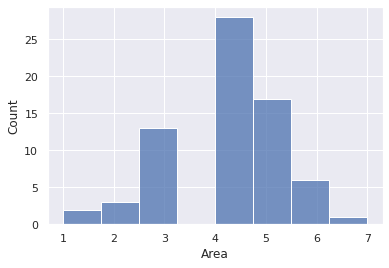

 
Plot: Count of Unique Elements v/s Perimeter for class 1


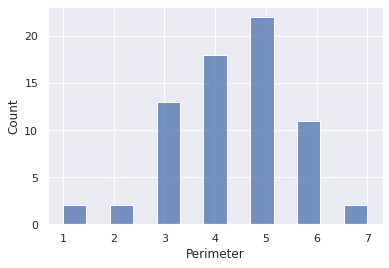

 
Plot: Count of Unique Elements v/s Compactness for class 1


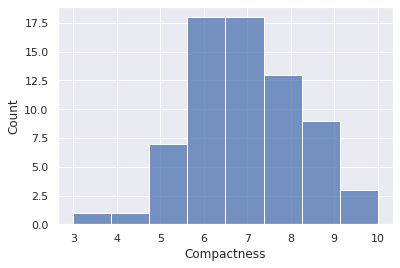

 
Plot: Count of Unique Elements v/s Length of kernel for class 1


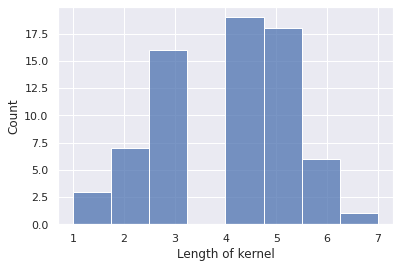

 
Plot: Count of Unique Elements v/s Width of Kernel for class 1


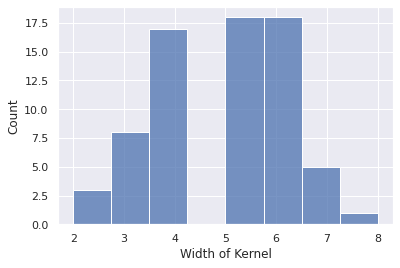

 
Plot: Count of Unique Elements v/s Asymmetry coefficient for class 1


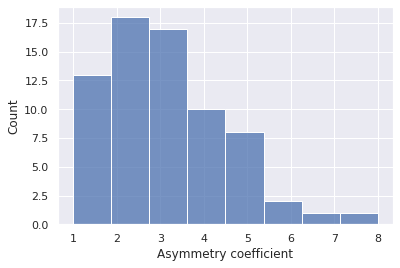

 
Plot: Count of Unique Elements v/s Length of kernel groove for class 1


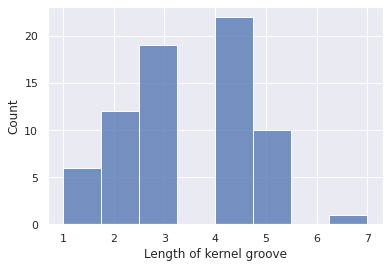

 
Plot: Count of Unique Elements v/s Area for class 2


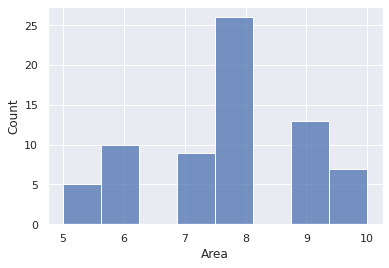

 
Plot: Count of Unique Elements v/s Perimeter for class 2


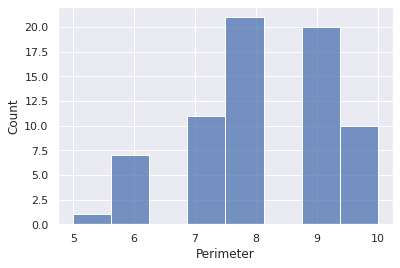

 
Plot: Count of Unique Elements v/s Compactness for class 2


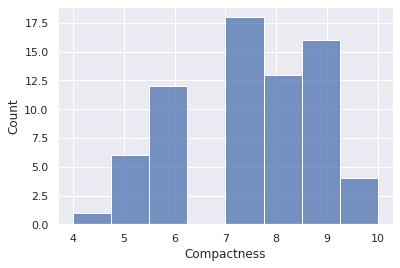

 
Plot: Count of Unique Elements v/s Length of kernel for class 2


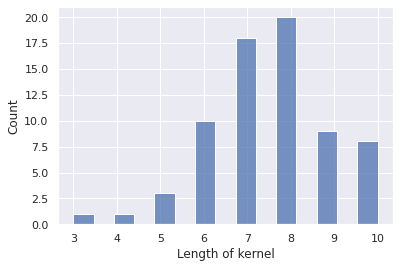

 
Plot: Count of Unique Elements v/s Width of Kernel for class 2


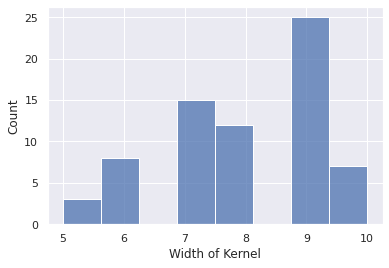

 
Plot: Count of Unique Elements v/s Asymmetry coefficient for class 2


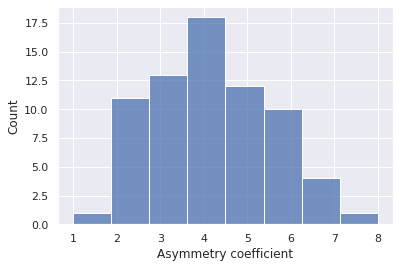

 
Plot: Count of Unique Elements v/s Length of kernel groove for class 2


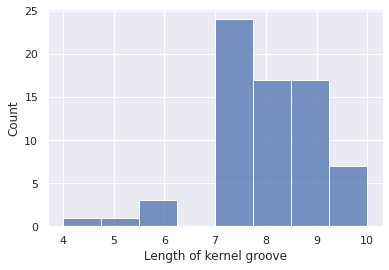

 
Plot: Count of Unique Elements v/s Area for class 3


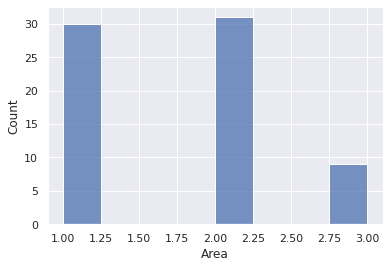

 
Plot: Count of Unique Elements v/s Perimeter for class 3


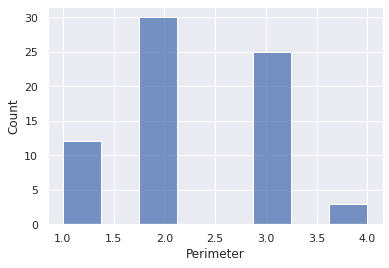

 
Plot: Count of Unique Elements v/s Compactness for class 3


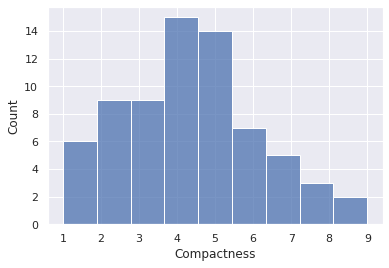

 
Plot: Count of Unique Elements v/s Length of kernel for class 3


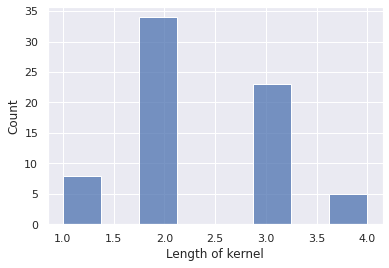

 
Plot: Count of Unique Elements v/s Width of Kernel for class 3


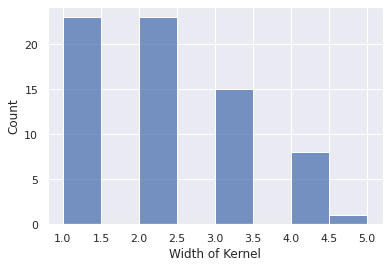

 
Plot: Count of Unique Elements v/s Asymmetry coefficient for class 3


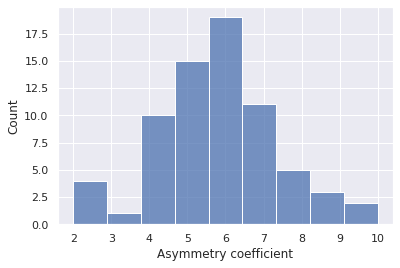

 
Plot: Count of Unique Elements v/s Length of kernel groove for class 3


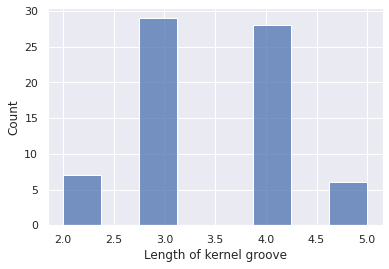

In [52]:
grouped = dataset.groupby(dataset.Classes)
dataframes = [grouped.get_group(1), grouped.get_group(2), grouped.get_group(3)]
cnt = 0
for i in dataframes:
    cnt=cnt+1
    for feature in i.columns:
        if feature != 'Classes':
            sns.histplot(i[feature])
            print(f"Plot: Count of Unique Elements v/s {feature} for class {cnt}")
            plt.show()
            print(" ")

In [53]:
X_test

,Area,Perimeter,Compactness,Length of kernel,Width of Kernel,Asymmetry coefficient,Length of kernel groove
154,1,2,3,2,1,5,4
75,6,7,6,6,6,6,7
10,5,6,6,5,5,5,4
92,8,9,8,8,8,4,8
150,2,2,4,3,2,6,4
0,5,6,6,5,5,2,4
38,4,5,7,5,5,4,4
123,8,8,10,7,9,3,7
51,5,6,8,5,6,7,4
188,1,1,5,2,2,9,3


In [54]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 154 to 97
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Area                     42 non-null     int64
 1   Perimeter                42 non-null     int64
 2   Compactness              42 non-null     int64
 3   Length of kernel         42 non-null     int64
 4   Width of Kernel          42 non-null     int64
 5   Asymmetry coefficient    42 non-null     int64
 6   Length of kernel groove  42 non-null     int64
dtypes: int64(7)
memory usage: 2.6 KB


In [55]:
att = ["Area", "Perimeter", "Compactness", "Length of kernel", "Width of Kernel", "Asymmetry coefficient", "Length of kernel groove"]

###**f.** Calculate the posterior probabilities and plot them in a single graph. Analyse the plot.

In [56]:
def posterior(sample_index, dataset, likelihood):
    feature_x = np.zeros((7), dtype = int)
    for i in range(7):
        feature_x[i] = dataset[att[i]][sample_index]
    post_class_1 = prob_class_1
    post_class_2 = prob_class_2
    post_class_3 = prob_class_3
    for i in range(7):
        post_class_1 *= likelihood[0][i][feature_x[i]-1]
        post_class_2 *= likelihood[1][i][feature_x[i]-1]
        post_class_3 *= likelihood[2][i][feature_x[i]-1]
    temp1 = post_class_1
    temp2 = post_class_2
    temp3 = post_class_3
    Sum = post_class_1 + post_class_2 + post_class_3
    post_class_1 = temp1/Sum
    post_class_2 = temp2/Sum
    post_class_3 = temp3/Sum
    print(feature_x)
    return post_class_1, post_class_2, post_class_3

In [57]:
test_indices1 = X_test.index
posterior_class_1 = []
posterior_class_2 = []
posterior_class_3 = []
for index in test_indices1:
    res = posterior(index, X_test, L)
    posterior_class_1.append(res[0])
    posterior_class_2.append(res[1])
    posterior_class_3.append(res[2])
    print(res[0], res[1], res[2])

[1 2 3 2 1 5 4]
1.5940038653934987e-06 2.4600331081298032e-08 0.9999983813958035
[6 7 6 6 6 6 7]
0.006834568510804901 0.9931555842960964 9.847193098672815e-06
[5 6 6 5 5 5 4]
0.9994916552513218 0.0004394643375570799 6.88804111212019e-05
[8 9 8 8 8 4 8]
1.1553897727316594e-06 0.9999985491031088 2.9550711853022595e-07
[2 2 4 3 2 6 4]
1.0335634470253957e-05 1.1342954449561812e-08 0.9999896530225754
[5 6 6 5 5 2 4]
0.9998499257834658 0.00014654062158575993 3.533594948408714e-06
[4 5 7 5 5 4 4]
0.9999869516983101 6.8521887800610336e-06 6.1961129097051575e-06
[ 8  8 10  7  9  3  7]
9.274255183886947e-07 0.9999990468043805 2.577010113511868e-08
[5 6 8 5 6 7 4]
0.9978339879216708 0.0020102062055587554 0.0001558058727704949
[1 1 5 2 2 9 3]
2.5811366559675592e-05 1.312204993077119e-07 0.999974057412941
[8 8 9 8 9 4 8]
2.710937864942962e-07 0.9999996865341932 4.237202031920403e-08
[8 8 8 8 8 3 9]
3.452622502394791e-06 0.9999964950482195 5.23292780854746e-08
[2 2 6 2 3 7 4]
0.00044466859835169876 

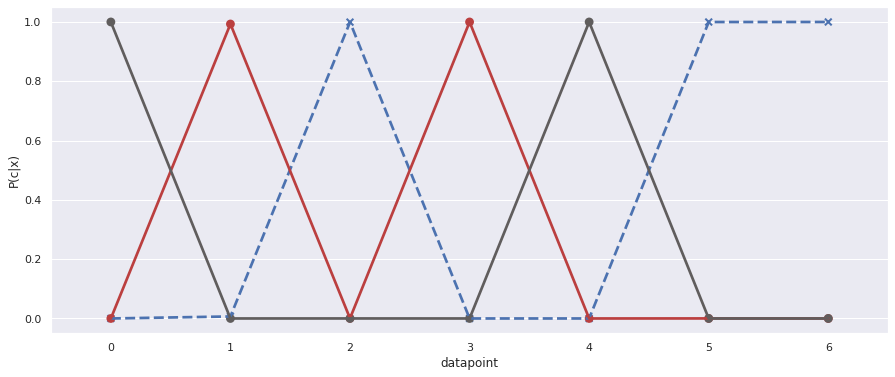

In [58]:
ll=[i for i in range(7)]
plt.figure(figsize=(15,6))

sns.pointplot(ll,posterior_class_1[0:7], linestyles="--",markers =['x'])
sns.pointplot(ll,posterior_class_2[0:7], linestyles="-",markers =['o'] , color="#bb3f3f")
sns.pointplot(ll,posterior_class_3[0:7], linestyles="-",markers =['o'], color="#605D5D")

plt.xlabel("datapoint")
plt.ylabel("P(c|x)")

plt.show()

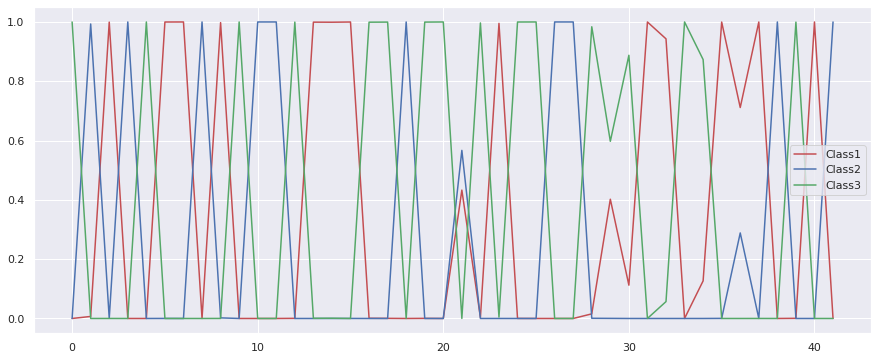

In [59]:
ll = [i for i in range(42)]
plt.figure(figsize=(15,6))
plt.plot(ll, posterior_class_1[0:42], color = 'r', label = 'Class1')
plt.plot(ll, posterior_class_2[0:42], color = 'b', label = 'Class2')
plt.plot(ll, posterior_class_3[0:42], color = 'g', label = 'Class3')

plt.legend()
plt.show()